In [ ]:
%matplotlib inline

In [2]:
basedir='/home/rms101/SCRIPTS/amoc_stab/'
import sys
sys.path.append(basedir + 'MODS')
import os
import cmipdata as cd
import numpy as np
import matplotlib.pyplot as plt # for basic plotting
import rms_plots as rpl
import rms_utils as rut
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
################settings
#mpl.style.reload_library()
#plt.style.use('rms_paper')
#rundir=basedir+'/1TS/GMST/';os.chdir(rundir)

registering cmaps
registering cmaps


1a. Calculate GM annual mean TAS timeseries LE
#####################################################

In [23]:
rundir='/home/rms101/SCRIPTS/amoc_stab/FIG1_GMST+AMOC/';os.chdir(rundir)
srcdir_base='/space/hall3/sitestore/eccc/crd/cetus3_data/CCCma_Output'    
datadir='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/DATA/amoc_stab_post'
do_calc=False
varnm='tas'
if do_calc:
    os.system('mkdir -p {}/DATA_{}_canesm2'.format(datadir,varnm))
    os.chdir('{}/DATA_{}_canesm2'.format(datadir,varnm))
    os.system('/bin/rm *.nc')

    # all historical 
    os.system('ln -s ' + srcdir_base +'/CanSISE/output/CCCma/CanESM2/historical-r*/mon/atmos/'+varnm+'/*/*.nc .')
    os.system('ln -s ' + srcdir_base +'/LOWWARMING/output/CCCma/CanESM2/lowwarming15/mon/atmos/'+varnm+'/*/*.nc .')
    os.system('ln -s ' + srcdir_base +'/LOWWARMING/output/CCCma/CanESM2/lowwarming20/mon/atmos/'+varnm+'/*/*.nc .')
    os.system('ln -s ' + srcdir_base +'/LOWWARMING/output/CCCma/CanESM2/lowwarming30/mon/atmos/'+varnm+'/*/*.nc .')

    # concat
    ens_his = cd.mkensemble('*historical-r*')
    ens_his = cd.cat_exp_slices(ens_his)
    ens_15c1 = cd.mkensemble('*lowwarming15*_r*i1p1_20??01-2???12.nc') #all up to 2100
    ens_15c1 = cd.cat_exp_slices(ens_15c1)
    ens_15c2 = cd.mkensemble('*lowwarming15*_r[1-5]i1p1_2[1-6]??01-2???12.nc') #1-5 past 2100
    ens_15c2 = cd.cat_exp_slices(ens_15c2)
    ens_20c1 = cd.mkensemble('*lowwarming20*_r*i1p1_20??01-2???12.nc') #all up to 2100
    ens_20c1 = cd.cat_exp_slices(ens_20c1)
    ens_20c2 = cd.mkensemble('*lowwarming20*_r[1-5]i1p1_2[1-6]??01-2???12.nc') #1-5 past 2100
    ens_20c2 = cd.cat_exp_slices(ens_20c2)
    ens_30c1 = cd.mkensemble('*lowwarming30*_r*i1p1_20??01-2???12.nc') #all up to 2100
    ens_30c1 = cd.cat_exp_slices(ens_30c1)
    ens_30c2 = cd.mkensemble('*lowwarming30*_r[1-5]i1p1_2[1-6]??01-2???12.nc') #1-5 past 2100
    ens_30c2 = cd.cat_exp_slices(ens_30c2)


    print 'Calculating annual and global mean tas'
    # annual global means            
    my_cdo_str='cdo -fldmean -yearmean {infile} {outfile}' 
    ens_his=cd.my_operator(ens_his, my_cdo_str, output_prefix='amgm_',delete=True)
    ens_15c1=cd.my_operator(ens_15c1, my_cdo_str, output_prefix='amgm_',delete=True)
    ens_20c1=cd.my_operator(ens_20c1, my_cdo_str, output_prefix='amgm_',delete=True)
    ens_30c1=cd.my_operator(ens_30c1, my_cdo_str, output_prefix='amgm_',delete=True)
    ens_15c2=cd.my_operator(ens_15c2, my_cdo_str, output_prefix='amgm_',delete=True)
    ens_20c2=cd.my_operator(ens_20c2, my_cdo_str, output_prefix='amgm_',delete=True)
    ens_30c2=cd.my_operator(ens_30c2, my_cdo_str, output_prefix='amgm_',delete=True)
else:
    os.chdir('{}/DATA_{}_canesm2'.format(datadir,varnm))
    ens_his = cd.mkensemble('amgm_*historical-r*',prefix='amgm_')
    ens_15c1 = cd.mkensemble('amgm_*lowwarming15*_r*i1p1_20??01-2???12.nc',prefix='amgm_') #all up to 2100
    ens_15c2 = cd.mkensemble('amgm_*lowwarming15*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='amgm_') #1-5 past 2100
    ens_20c1 = cd.mkensemble('amgm_*lowwarming20*_r*i1p1_20??01-2???12.nc',prefix='amgm_') #all up to 2100
    ens_20c2 = cd.mkensemble('amgm_*lowwarming20*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='amgm_') #1-5 past 2100
    ens_30c1 = cd.mkensemble('amgm_*lowwarming30*_r*i1p1_20??01-2???12.nc',prefix='amgm_') #all up to 2100
    ens_30c2 = cd.mkensemble('amgm_*lowwarming30*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='amgm_') #1-5 past 2100


tas_his=cd.loadfiles(ens_his,varnm)['data']
tas_15c1=cd.loadfiles(ens_15c1,varnm)['data']
tas_20c1=cd.loadfiles(ens_20c1,varnm)['data']
tas_30c1=cd.loadfiles(ens_30c1,varnm)['data']

tas_15c2=cd.loadfiles(ens_15c2,varnm)['data']
tas_20c2=cd.loadfiles(ens_20c2,varnm)['data']
tas_30c2=cd.loadfiles(ens_30c2,varnm)['data']

os.chdir(rundir)
#Years#############################################
years_his=np.arange(1950,2100+1)
years_15c1=np.arange(2021,2100+1)
years_20c1=np.arange(2036,2100+1)
years_30c1=np.arange(2061,2100+1)
years2=np.arange(2101,2600+1)
years_his_pre30c=np.arange(1950,2061)
tas_his_pre30c=tas_his[:,0:rut.find_nearest(years_his,2061)]

This ensemble contains:
1 variables
1 models
5 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 



1b. Calculate GM annual mean PI TAS timeseries
#####################################################

In [24]:
calc_tas_pi=False
if calc_tas_pi:
    os.system('mkdir -p {}/DATA_TAS_PI'.format(datadir))
    os.chdir('{}/DATA_TAS_PI'.format(datadir))
    os.system('/bin/rm *.nc')
    os.system('ln -s '+srcdir_base+'/CMIP5/output/CCCma/CanESM2/piControl/mon/atmos/tas/r1i1p1/tas_Amon_CanESM2_piControl_r1i1p1*.nc .')
    # concat
    ens_tas_raw = cd.mkensemble('tas_Amon_CanESM2_piControl*')
    ens_tas = cd.cat_exp_slices(ens_tas_raw)
    # global and annual means
    my_cdo_str='cdo -fldmean -yearmean {infile} {outfile}' 
    ens_tas_pi=cd.my_operator(ens_tas, my_cdo_str, output_prefix='amgm_',delete=True)
else:
    os.chdir(datadir+'/DATA_TAS_PI')
    ens_tas_pi=cd.mkensemble('amgm_tas_Amon*',prefix='amgm_')

datadict_tas_pi = cd.loadfiles(ens_tas_pi,'tas')
tas_pi=datadict_tas_pi['data']
os.chdir('../')

tas_his_pre30c=tas_his_pre30c-np.mean(tas_pi)

tas_15c1=tas_15c1-np.mean(tas_pi)
tas_20c1=tas_20c1-np.mean(tas_pi)
tas_30c1=tas_30c1-np.mean(tas_pi)

tas_15c2=tas_15c2-np.mean(tas_pi)
tas_20c2=tas_20c2-np.mean(tas_pi)
tas_30c2=tas_30c2-np.mean(tas_pi)
os.chdir(rundir)

This ensemble contains:
1 variables
1 models
1 experiments
1 realizations
1 ncfiles

 For more details use ens.fulldetails() 



2. Plot (mean)
#####################################################

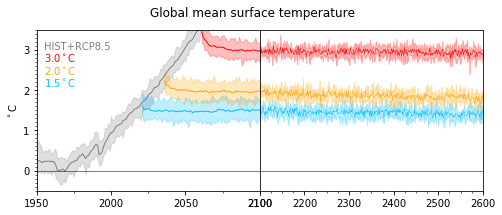

In [25]:
fig1, axs = plt.subplots(1,2, figsize=(8,8)); 
fig1.subplots_adjust(bottom=0.6,wspace=0)

#1950-2100############################################
ax=axs[0]
ax.set_xlim([1950, 2100]) 
    
ax.set_xticks(np.arange(1950,2125,25))
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(25)) 

ax.set_ylim([-0.5, 3.5])
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_ylabel('$^\circ$C')
    
####### plot
##his##

kwargs={'linewidth': 1, 'color': 'gray'}
ax.plot(years_his_pre30c,np.mean(tas_his_pre30c,axis=0),**kwargs)  
kwargs={'color':'gray', 'alpha': 0.25, 'edgecolor':'none'}
ax.fill_between(years_his_pre30c,np.min(tas_his_pre30c,axis=0), np.max(tas_his_pre30c,axis=0),**kwargs)
                                
##15c##
kwargs={'linewidth': 1, 'color': 'deepskyblue'}
ax.plot(years_15c1,np.mean(tas_15c1,axis=0),**kwargs)
kwargs={'color':'deepskyblue', 'alpha': 0.25, 'edgecolor':'none'}
ax.fill_between(years_15c1,np.min(tas_15c1,axis=0), np.max(tas_15c1,axis=0),**kwargs)

##20c##
kwargs={'linewidth': 1, 'color': 'orange'}
ax.plot(years_20c1,np.mean(tas_20c1,axis=0),**kwargs)
kwargs={'color':'orange', 'alpha': 0.25, 'edgecolor':'none'}
ax.fill_between(years_20c1,np.min(tas_20c1,axis=0), np.max(tas_20c1,axis=0),**kwargs)

##30c##
kwargs={'linewidth': 1, 'color': 'red'}
ax.plot(years_30c1,np.mean(tas_30c1,axis=0),**kwargs)
kwargs={'color':'red', 'alpha': 0.25, 'edgecolor':'none'}
ax.fill_between(years_30c1,np.min(tas_30c1,axis=0), np.max(tas_30c1,axis=0),**kwargs)

##linesc##
ax.axhline(y=0,color="black",linewidth=0.5)


##legend##
ax.text(1955,3,'HIST+RCP8.5',color= 'gray')
ax.text(1955,2.7,'3.0$^\circ$C',color= 'red')
ax.text(1955,2.4,'2.0$^\circ$C',color= 'orange')
ax.text(1955,2.1,'1.5$^\circ$C',color= 'deepskyblue')


#2100-2600############################################
ax=axs[1]
ax.set_xlim([2100, 2600]) 
ax.set_xticks=np.arange(2200,2700,100) 
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(25)) 

ax.set_ylim([-0.5, 3.5])
#ax.yaxis.set_major_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_yticklabels((''))
ax.yaxis.set_tick_params(length=0,width=0)
####### plot                                
##15c##
kwargs={'linewidth': 0.5, 'color': 'deepskyblue'}
ax.plot(years2,np.mean(tas_15c2,axis=0),**kwargs)
kwargs={'color':'deepskyblue', 'alpha': 0.25, 'edgecolor':'none'}
ax.fill_between(years2,np.min(tas_15c2,axis=0), np.max(tas_15c2,axis=0),**kwargs)

##20c##
kwargs={'linewidth': 0.5, 'color': 'orange'}
ax.plot(years2,np.mean(tas_20c2,axis=0),**kwargs)
kwargs={'color':'orange', 'alpha': 0.25, 'edgecolor':'none'}
ax.fill_between(years2,np.min(tas_20c2,axis=0), np.max(tas_20c2,axis=0),**kwargs)

##30c##
kwargs={'linewidth': 0.5, 'color': 'red'}
ax.plot(years2,np.mean(tas_30c2,axis=0),**kwargs)
kwargs={'color':'red', 'alpha': 0.25, 'edgecolor':'none'}
ax.fill_between(years2,np.min(tas_30c2,axis=0), np.max(tas_30c2,axis=0),**kwargs)

##linesc##
ax.axhline(y=0,color="black",linewidth=0.5)


#title and save############################################
fig1.suptitle('Global mean surface temperature',y=0.92)
#ax.text(2080,10.5,'Year')
#rpl.add_title(ax,'AMOC (50 runs, ensemble mean)')
rpl.mysavefig(fig1,'PLOTS/fig1a_GMST_canesm2.png')



